### Programming Assignment: Градиентный бустинг своими руками

In [143]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
data = datasets.load_boston()

In [41]:
data

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [219]:
y = data['target']

In [220]:
X = data['data']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [343]:
base_algorithms_list = []
coefficients_list = [np.arange(0.05, 0.9, 0.05)]

In [284]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in 
                 zip(base_algorithms_list, coefficients_list)]) for x in X]


In [344]:
algo = DecisionTreeRegressor(max_depth = 5, random_state = 42)
algo.fit(X_train, y_train)
base_algorithms_list.append(algo)

[[ 29.3228442   26.53211513  26.53211513 ...,  26.53211513  23.18648056
   38.16230261]
 [ 29.0307929   26.24006383  26.24006383 ...,  26.24006383  22.89442926
   37.87025131]
 [ 28.75334416  25.96261509  25.96261509 ...,  25.96261509  22.61698053
   37.59280258]
 ..., 
 [ 24.00602008  21.21529101  21.21529101 ...,  21.21529101  17.86965644
   32.84547849]
 [ 23.97980999  21.18908091  21.18908091 ...,  21.18908091  17.84344635
   32.8192684 ]
 [ 23.9549104   21.16418132  21.16418132 ...,  21.16418132  17.81854676
   32.79436881]]
[[ 34.54902538  31.7582963   31.7582963  ...,  31.7582963   28.41266174
   43.38848379]
 [ 33.44230466  30.65157558  30.65157558 ...,  30.65157558  27.30594102
   42.28176307]
 [ 32.44625601  29.65552694  29.65552694 ...,  29.65552694  26.30989237
   41.28571442]
 ..., 
 [ 23.56005947  20.7693304   20.7693304  ...,  20.7693304   17.42369583
   32.39951788]
 [ 23.55223534  20.76150627  20.76150627 ...,  20.76150627  17.4158717
   32.39169375]
 [ 23.54519362  20

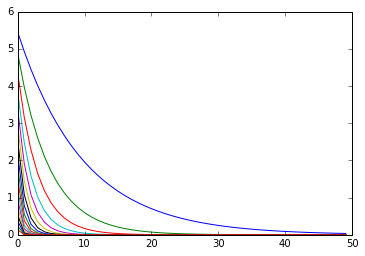

In [346]:
for coeff in np.arange(0.05, 0.9, 0.05):
    a = algo.predict(X_train)
    m = [] 
    a_s = [a]
    base_algorithms_list.append(algo)
    for i in np.arange(50):
        algo_1 = coeff*(y_train-a) 
        base_algorithms_list.append(algo_1)
        a = a + algo_1
        a_s.append([a])
        m.append([mean_squared_error(y_train, a)])
    plt.plot(np.arange(50), m)
    
    b = algo.predict(X_test) 
    b_s = [b]
    #base_algorithms_list = []
    #base_algorithms_list.append(a)
    for i in np.arange(50):
        algo_2 = coeff*sqrt(m) 
        #base_algorithms_list.append(algo_1)
        b = b + algo_2
        b_s.append(b)
    print b

In [409]:
def gbt_fit(X,y, estimator = DecisionTreeRegressor(max_depth = 5, random_state = 42),
            coeff = 0.9, n_trees = 50):
    e = estimator.fit(X, y)
    a = e.predict(X) 
    m = [] 
    a_s = [a]
    base_algorithms_list = []
    base_algorithms_list.append(a)
    for i in np.arange(n_trees):
        algo_1 = coeff*(y-a) 
        base_algorithms_list.append(algo_1)
        a = a + algo_1
        a_s.append(a)
        m.append(mean_squared_error(y, a))
    return e, m

In [410]:
e, m = gbt_fit(X_train, y_train)

In [411]:
def gbt_predict(X, e, m, coeff = 0.9, n_trees = 50, ):
    b = e.predict(X) 
    b_s = [b]
    #base_algorithms_list = []
    #base_algorithms_list.append(a)
    for i in np.arange(n_trees):
        algo_2 = coeff*sqrt(m[i]) 
        #base_algorithms_list.append(algo_1)
        b = b + algo_2
        b_s.append(b)
    return b_s

In [412]:
p = gbt_predict(X_test, e, m)

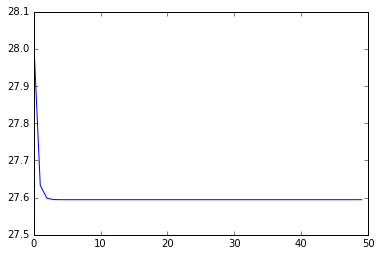

In [413]:
mse = []
for i in np.arange(50):
    mse.append(mean_squared_error(y_test, p[i]))
plt.plot(np.arange(50), mse)

In [414]:
mse.index(min(mse))

15

In [415]:
b_s[15]

array([[ 28.18538124,  25.39465217,  25.39465217, ...,  25.39465217,
         22.0490176 ,  37.02483965],
       [ 24.18735264,  21.39662357,  21.39662357, ...,  21.39662357,
         18.050989  ,  33.02681105],
       [ 23.58764835,  20.79691928,  20.79691928, ...,  20.79691928,
         17.45128471,  32.42710676],
       ..., 
       [ 23.48181818,  20.69108911,  20.69108911, ...,  20.69108911,
         17.34545455,  32.3212766 ],
       [ 23.48181818,  20.69108911,  20.69108911, ...,  20.69108911,
         17.34545455,  32.3212766 ],
       [ 23.48181818,  20.69108911,  20.69108911, ...,  20.69108911,
         17.34545455,  32.3212766 ]])

In [426]:
estimator = xgb.XGBRegressor()

In [427]:
estimator.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [428]:
mean_squared_error(y_test, estimator.predict(X_test))

17.467962377911512

In [429]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
mean_squared_error(y_test, regressor.predict(X_test))

29.790559164237649